# Exploratory Data Analysis For Air Quality
## Data Visualization for different cities

In [80]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# To show multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
df = pd.read_csv('../data/AirData.csv')

In [83]:
df.head()

,City,datemon,PM2.5,NO,NO2,CO,SO2,O3,AQI,AQI Bucket
0,Ahmedabad,01-01-2018,88.851290,33.074194,141.646774,33.074194,109.395807,51.065161,692.166667,Severe
1,Ahmedabad,01-02-2018,102.198519,57.090000,155.731852,57.090000,120.838846,42.121481,932.000000,Severe
2,Ahmedabad,01-03-2018,97.916129,34.509032,114.696452,34.509032,92.539355,48.057931,781.225806,Severe
3,Ahmedabad,01-04-2018,81.731667,22.618667,61.712667,22.618667,51.413000,43.900345,556.266667,Severe
4,Ahmedabad,01-05-2018,53.551935,12.283548,33.376129,12.283548,68.981613,32.981600,322.896552,Very Poor


In [84]:
df.dtypes


City           object
datemon        object
PM2.5         float64
NO            float64
NO2           float64
CO            float64
SO2           float64
O3            float64
AQI           float64
AQI Bucket     object
dtype: object

In [85]:
#convert datetime to datatype datetime
df['datemon_datetime'] = pd.to_datetime(df['datemon'])
#get year from date time
df['datemon_year'] = pd.DatetimeIndex(df['datemon_datetime']).year
#get month from date time
df['datemon_month'] = pd.DatetimeIndex(df['datemon_datetime']).month

In [86]:
average_AQI_based_on_city_year = df.groupby(['City','datemon_year'])[['AQI']].mean().reset_index()
average_AQI_based_on_city_year.dtypes

City             object
datemon_year      int64
AQI             float64
dtype: object

## Univariate Analysis

### Histogram

Text(0.5, 1.0, 'Average AQI Histogram Based On City And Year')

Text(0.5, 0, 'Air Quality Index')

Text(0, 0.5, 'Frequency')

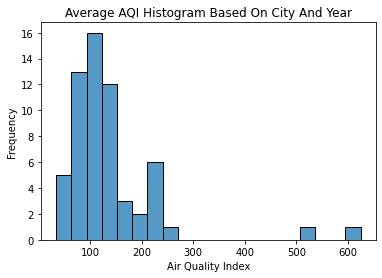

In [87]:
hist,axes= plt.subplots()
axes = sns.histplot(average_AQI_based_on_city_year['AQI'],kde=False)
axes.set_title('Average AQI Histogram Based On City And Year' )
axes.set_xlabel('Air Quality Index')
axes.set_ylabel('Frequency')
plt.show()

In [88]:
Max_NO2_emission_based_on_city_year_month = df.\
groupby(['City','datemon_year','datemon_month'])\
[['NO2']].max().reset_index()
Max_NO2_emission_based_on_city_year_month.dtypes
Max_NO2_emission_based_on_city_year_month.head()

City              object
datemon_year       int64
datemon_month      int64
NO2              float64
dtype: object

,City,datemon_year,datemon_month,NO2
0,Ahmedabad,2018,1,155.731852
1,Ahmedabad,2019,1,153.196774
2,Ahmedabad,2020,1,62.714828
3,Aizawl,2020,1,0.820476
4,Amaravati,2018,1,68.005806


### Rug Plot

Text(0.5, 1.0, 'Maximum NO2 Emission Histogram Based On City,Month And Year')

Text(0.5, 0, 'NO2 Emission')

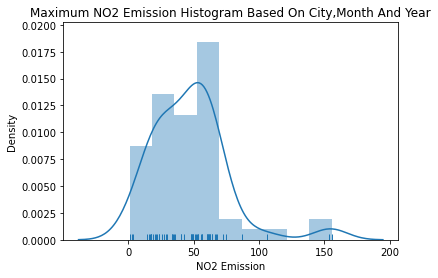

In [89]:
#Rug Plot is one dimensional representation so y label is not needed
#disabling warnings as distplot deprecated
import warnings
warnings.filterwarnings("ignore")
hist_rug,axes= plt.subplots()
axes = sns.distplot(Max_NO2_emission_based_on_city_year_month['NO2'],rug=True)
axes.set_title('Maximum NO2 Emission Histogram Based On City,Month And Year' )
axes.set_xlabel('NO2 Emission')
plt.show()

### Count  Plot

Text(0.5, 1.0, 'Count Of Each Severity Level For Air Quality Index')

Text(0.5, 0, 'Severity Level')

Text(0, 0.5, 'Frequency')

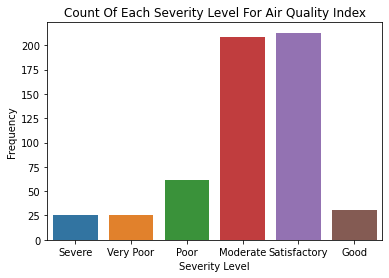

In [90]:
count,axes= plt.subplots()
axes = sns.countplot('AQI Bucket', data= df)
axes.set_title('Count Of Each Severity Level For Air Quality Index' )
axes.set_xlabel('Severity Level')
axes.set_ylabel('Frequency')
plt.show()

## Bivariate Analysis

### Scatter Plot

Text(0.5, 1.0, 'Impact Of NO2 Vs PM2.5 On Air Quality Index')

Text(0.5, 0, 'NO2 Emission Vs PM2.5 Levels')

Text(0, 0.5, 'Air Quality Index')

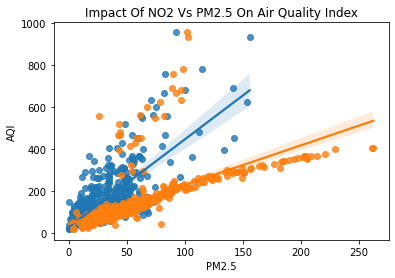

In [91]:
#how does PM2.5 levels and nitrogen dioxide levels impact Air Quality
#which one impacts more?
count,axes= plt.subplots()
axes = sns.regplot(x='NO2', y='AQI', data= df)
axes.set_title('Impact Of NO2 Vs PM2.5 On Air Quality Index' )
axes.set_xlabel('NO2 Emission Vs PM2.5 Levels')
axes.set_ylabel('Air Quality Index')
axes1 = sns.regplot(x='PM2.5', y='AQI', data= df)
plt.show()
#from the graph below NO2 seems to impact Air quality more than PM2.5 levels

### Box Plot

In [94]:
#Find top 10 highest NO2 contributing cities
Sum_NO2_Contribution_By_City = df['NO2'].groupby(df['City']).sum().reset_index()
df2 = Sum_NO2_Contribution_By_City.sort_values('NO2',ascending = False).head(10)


In [95]:
#merging two tables using right join 
# to fetch NO2 levels only for required cities
df_new = df.merge(df2,
                 left_on=['City'],
                 right_on=['City'],
                how='right')

Text(0.5, 1.0, 'Box Plot For Top 10 Cities With High NO2 Levels')

Text(0.5, 0, 'City')

Text(0, 0.5, 'NO2 Levels')

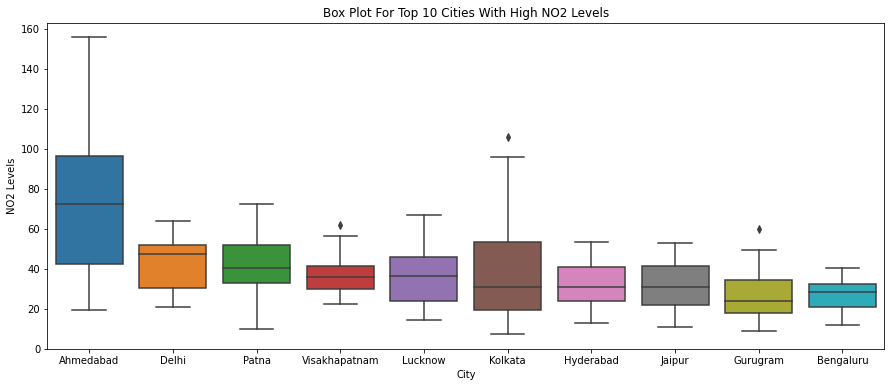

In [96]:
#Find the minimum,Q1,Median,Q3,Maximum levels of NO2
#For top 10 contributing cities
fig, axes = plt.subplots(figsize=(15, 6))

axes = sns.boxplot(x='City', y='NO2_x', data= df_new)
axes.set_title('Box Plot For Top 10 Cities With High NO2 Levels' )
axes.set_xlabel('City')
axes.set_ylabel('NO2 Levels')
plt.show()

## MultiVariate Analysis

### Factor Plot

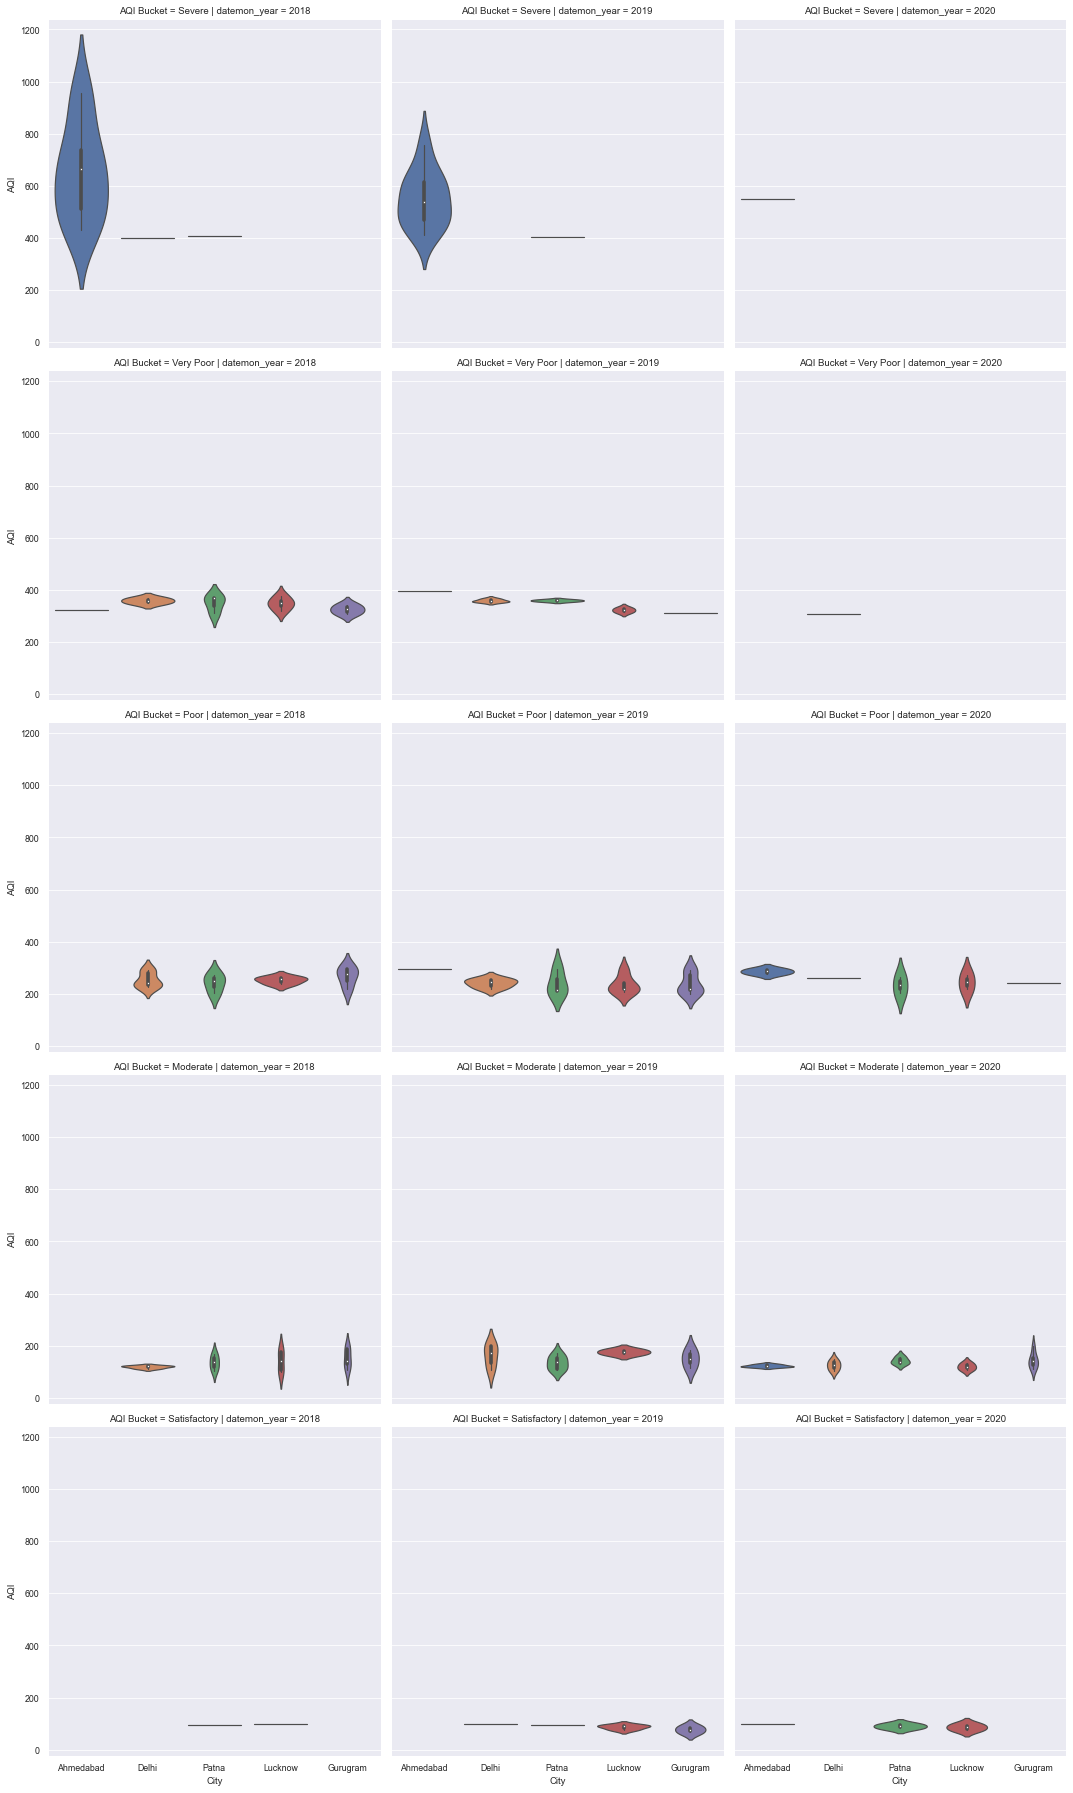

In [101]:
#To visualize contribution of High AQI
# for top 5 cities for given month and year using Violin plot
Sum_AQI_Contribution_By_City = df['AQI'].groupby(df['City']).sum().reset_index()
df3 = Sum_AQI_Contribution_By_City.sort_values('AQI',ascending = False).head(5)
df_new_AQI = df.merge(df3,
                 left_on=['City'],
                 right_on=['City'],
                how='right')
sns.set_theme('paper')
facet = sns.factorplot(x='City', y = 'AQI_x', data=df_new_AQI, row = 'AQI Bucket',col='datemon_year', kind ='violin')
facet.set_xlabels('City')
facet.set_ylabels('AQI')
